In [1]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
sm.init_printing(use_unicode=True)

In [93]:
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]') 

Question 1

In [94]:
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

In [95]:
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

In [6]:
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

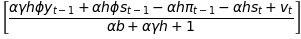

In [7]:
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y

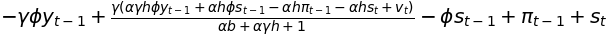

In [9]:
eq_pi= SRAS_pit.subs(yt,eq_y[0])
eq_pi

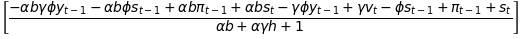

In [51]:
#not necessary
eq_pi= SRAS_pit.subs(yt,eq_yt)
eq_pii= sm.solve(sm.Eq(eq_pi,pit),pit)
eq_pii

Question 2

In [54]:
pms = {}

pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075

In [55]:
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)


In [56]:
equili_output(0,0,0,0,0)


In [57]:
equili_output(0.1,0,0,0,0)

In [64]:
equil_pi= sm.lambdify((pit_m1, yt, yt_m1, st, st_m1, gamma, phi), SRAS_pit)
def equili_pi (pit_m1, yt, yt_m1, st, st_m1, gamma=pms['gamma'], phi=pms['phi']):
    return equil_pi (pit_m1, yt, yt_m1, st, st_m1, gamma, phi)

In [65]:
equili_pi(0,0,0,0,0)

In [66]:
equili_pi(0,0.0244140625,0,0,0)

Question 3

In [67]:
pms["delta"] = 0.80
pms["omega"] = 0.15
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")


In [68]:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

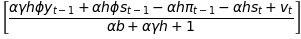

In [69]:
eq_y

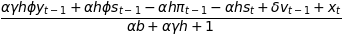

In [70]:
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

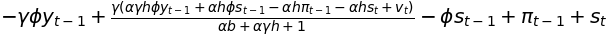

In [71]:
eq_pi

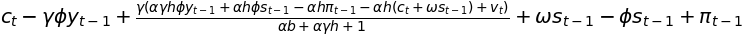

In [72]:
eq_pi_ar = eq_pi.subs(st,st_ar)
eq_pi_ar

In [73]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

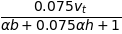

In [74]:
equili_pi_ar(0,0,0,0,0)

In [ ]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [ ]:
#other approach

In [ ]:
#define shocks:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

In [ ]:
#set number of periods
P= 1000
# all initial values are 0:
initial_y= 

### Question 3

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

We define parameters:

In [15]:
#parameters:
N = 100
mu = np.array([3,2,1]) 
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]) 
gamma = 0.8 
zeta = 1

#seed
seed = 1986 
np.random.seed(seed)

#preferances
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N)) 
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

beta1= betas[:,0]
beta2= betas[:,1]
beta3=betas[:,2]

alpha1= alphas[:,0]
alpha2= alphas[:,1]
alpha2= alphas[:,2]

#endowments
e1 = np.random.exponential(zeta,size=N) 
e2 = np.random.exponential(zeta,size=N) 
e3 = np.random.exponential(zeta,size=N) 

#### Exercise 3.1

#### Question 1: Plot the histograms of the budget shares for each good across agents.

We make a histogram and plot the betas:

<function matplotlib.pyplot.show(*args, **kw)>

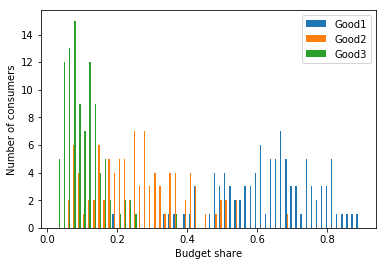

In [19]:
plt.hist(betas, bins = 60, label= ("Good1", 'Good2', 'Good3'))
plt.legend()
plt.xlabel('Budget share')
plt.ylabel('Number of consumers')
plt.show

#### Exercise 3.2

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

We define the demand and excess demand functions for each of the three goods. We have also converted the excess demand functions into one value by summing them up, to use later to find the equilibrium.

In [4]:
#demand functions
# We can eliminate p3 from the demand function, as it is equal to 1 (with p3*e3=e3)

def demand_good1 (beta1, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta1*(I/p1)

def demand_good2 (beta2, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta2*(I/p2)

def demand_good3 (beta3, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta2*(I)

In [5]:
#excess demand functions:

def excess_demand_good1(beta1, p1, e1, p2, e2, e3):
  
        #demand
    demand = demand_good1(beta1, p1, e1, p2, e2, e3)
   
        #supply
    supply= e1
  
        #excess demand
    excess_demand= demand-supply
    
    return excess_demand

In [6]:
def excess_demand_good2(beta2, p1, e1, p2, e2, e3):
    
    #demand
    demand= demand_good2(beta2, p1, e1, p2, e2, e3)
  
    #supply
    supply= e2
    
    #excess demand
    excess_demand= demand- supply
    
    return excess_demand

In [7]:
def excess_demand_good1_value(beta1, p1, e1, p2, e2, e3):
  
    excess_demand_good1_value = np.sum(excess_demand_good1(beta1, p1, e1, p2, e2, e3))
    
    return excess_demand_good1_value

In [8]:
def excess_demand_good2_value(beta2, p1, e1, p2, e2, e3):
    
    #demand
    excess_demand_value2= np.sum(excess_demand_good2(beta2, p1, e1, p2, e2, e3))
    
    return excess_demand_value2

We make two 3D plots for the excess demands of goods 1 and 2.

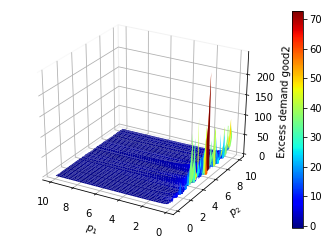

In [9]:
# a. prices 
p1_vec = np.linspace(0.1,10,100)
p2_vec = np.linspace(0.1,10,100)
                     
# b. plot
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand_good1_grid = excess_demand_good1(beta1,p1_grid,e1,p2_grid,e2,e3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,excess_demand_good1_grid,cmap=cm.jet)

# c. add labels
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Excess demand good2')

# d. invert xaxis
ax.invert_xaxis()

# e. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# f. add colorbar
fig.colorbar(cs);
plt.show()

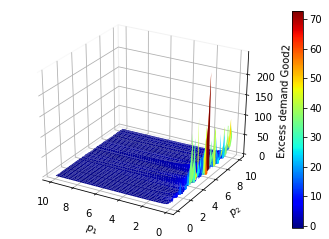

In [10]:
# make a 3d plot of excess demand for good2:

# a. plot
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand_good2_grid = excess_demand_good2(beta2,p1_grid,e1,p2_grid,e2,e3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,excess_demand_good1_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Excess demand Good2')

# c. invert xaxis
ax.invert_xaxis()

# d. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# e. add colorbar
fig.colorbar(cs);
plt.show()

#### Excercise 3.3

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

Just like in the lecture, we use a while loop to determine the equilibrium prices, for which excess demands are both zero. We set out guesses for the prices to one.

In [11]:
def find_equilibrium(betas, p1, e1, p2, e2, e3, kappa=0.5,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good1_value(beta1, p1, e1, p2, e2, e3)
        Z2 = excess_demand_good2_value(beta2, p1, e1, p2, e2, e3)
        
        # b: step 2: stop?
        if np.abs(Z1) < eps and np.abs(Z2) < eps or t >= maxiter:
            print(f'{t}: p1= {p1} -> excess demand Z1= {Z1}')
            print(f'{t}: p2= {p2} -> excess demand Z2= {Z2}')
            break 

        # c. step 3: update p1
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
        
            
        t += 1   

    return p1, p2

In [12]:
p1,p2= find_equilibrium(betas, 1, e1, 1, e2, e3)

1844: p1= 6.149742400548352 -> excess demand Z1= 9.996033889514422e-09
1844: p2= 2.685539126759021 -> excess demand Z2= 4.059743818896067e-09


After 1844 iterations, we find the equilibrium prices of around 6.15 for p1 and 2.67 for p2. P3 is normalized to 1. 

We check to make sure that demand is really smaller than epsilon.

In [186]:
eps=1e-8
Z1 = excess_demand_good1_value(beta1, p1, e1, p2, e2, e3)
Z2 = excess_demand_good2_value(beta2, p1, e1, p2, e2, e3)
print(Z1,Z2)
assert(np.abs(Z1) < eps)
assert(np.abs(Z2) < eps)

9.996033889514422e-09 4.059743818896067e-09


#### Excercise 3.4

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

We define the utility function, insert the above calculated equilibrium prices in the function and plot it as a histogram. 

In [152]:
#defining utility function
def utility(betas, p1, e1, p2, e2, e3, gamma):
    x1= demand_good1(betas[:,0], p1, e1, p2, e2, e3)
    x2= demand_good2(betas[:,1], p1, e1, p2, e2, e3)
    x3= demand_good3(betas[:,2], p1, e1, p2, e2, e3)
    
    utility= (x1**beta1+x2**beta2+x3**beta3)**gamma 

    return utility

In [161]:
#inserting equilibrium prices
utility_dist = utility(betas, 6.149742400548352, e1, 2.685539126759021, e2, e3, gamma)

<function matplotlib.pyplot.show(*args, **kw)>

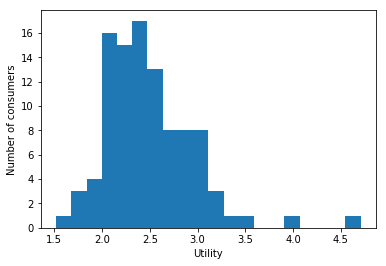

In [172]:
#making a histogram
plt.hist(utility_dist, bins= 20)
plt.xlabel('Utility')
plt.ylabel('Number of consumers')
plt.show

Lastly, we calculate mean and variance.

In [166]:
np.mean(utility_dist)

In [170]:
np.var(utility_dist)